# 모델 성능평가 지표 살펴보기 => 다중분류
- scikit-learn의 metrics
- pytorch의 torchmetrics
- 직접 평가 함수 생성

- 모듈로딩 및 데이터 준비

In [4]:
# 모듈 로딩
import torch
import torchmetrics.functional.classification as torch_metrics
import sklearn.metrics as sk_metrics
import numpy as np
from sklearn.model_selection import StratifiedKFold

In [25]:
# 임의의 데이터 준비 : 다중분류 0, 1, 2
target = torch.tensor([2, 1, 0, 0])
preds = torch.tensor([2, 1, 0, 1])

- 성능 평가 [1] torch_metrics


In [26]:
# 혼돈행렬(confusion matrix)
con = torch_metrics.confusion_matrix(preds, target, task="multiclass", num_classes=3)
print(f"[confusion matrix]\n{con}")

[confusion matrix]
tensor([[1, 1, 0],
        [0, 1, 0],
        [0, 0, 1]])


In [27]:
# micro 경우 즉, 균형 데이터 셋
pre = torch_metrics.precision(preds, target, task='multiclass', num_classes=3, average='micro')
recall = torch_metrics.recall(preds, target, task='multiclass', num_classes=3, average='micro')
f1 = torch_metrics.f1_score(preds, target, task='multiclass', num_classes=3, average='micro')
accuracy = torch_metrics.accuracy(preds, target, task='multiclass', num_classes=3, average='micro')
torch_metrics.multiclass_accuracy(preds, target, num_classes=3, average='micro')

print(f"[Target] ==> {target}")
print(f"[Prediction] ==> {preds}")
print(f"[pre] : {pre}\n[recall] : {recall}\n[f1] : {f1}\n[accuracy] : {accuracy}")

[Target] ==> tensor([2, 1, 0, 0])
[Prediction] ==> tensor([2, 1, 0, 1])
[pre] : 0.75
[recall] : 0.75
[f1] : 0.75
[accuracy] : 0.75


In [28]:
# macro 경우 즉, 균형 데이터 셋
pre = torch_metrics.precision(preds, target, task='multiclass', num_classes=3, average='macro')
recall = torch_metrics.recall(preds, target, task='multiclass', num_classes=3, average='macro')
f1 = torch_metrics.f1_score(preds, target, task='multiclass', num_classes=3, average='macro')
accuracy = torch_metrics.accuracy(preds, target, task='multiclass', num_classes=3, average='macro')
torch_metrics.multiclass_accuracy(preds, target, num_classes=3, average='macro')

print(f"[Target] ==> {target}")
print(f"[Prediction] ==> {preds}")
print(f"[pre] : {pre}\n[recall] : {recall}\n[f1] : {f1}\n[accuracy] : {accuracy}")

[Target] ==> tensor([2, 1, 0, 0])
[Prediction] ==> tensor([2, 1, 0, 1])
[pre] : 0.8333333730697632
[recall] : 0.8333333730697632
[f1] : 0.7777777910232544
[accuracy] : 0.8333333730697632


In [29]:
# 성능평가 2
# tensor => numpy
target = np.array(target)
preds = preds.numpy()

[[1 1 0]
 [0 1 0]
 [0 0 1]]


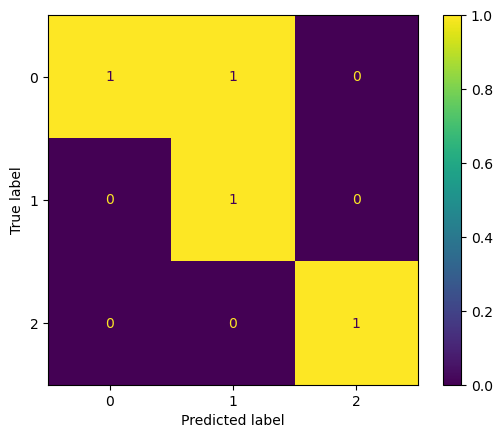

In [30]:
import matplotlib.pyplot as plt

con = sk_metrics.confusion_matrix(target, preds)
print(con)
con_Display = sk_metrics.ConfusionMatrixDisplay(con)
con_Display.plot()
plt.show()

In [31]:
# 다중 분류 성능 분석 출력
pre = sk_metrics.precision_score(preds, target, average='macro')
recall = sk_metrics.recall_score(preds, target, average='macro')
f1 = sk_metrics.f1_score(preds, target, average='macro')

accuracy = sk_metrics.accuracy_score(preds, target)
# sk_metrics.multiclass_accuracy(preds, target, num_classes=3, average='macro')

print(f"[Target] ==> {target}")
print(f"[Prediction] ==> {preds}")
print(f"[pre] : {pre}\n[recall] : {recall}\n[f1] : {f1}\n[accuracy] : {accuracy}")

[Target] ==> [2 1 0 0]
[Prediction] ==> [2 1 0 1]
[pre] : 0.8333333333333334
[recall] : 0.8333333333333334
[f1] : 0.7777777777777777
[accuracy] : 0.75
